# Capstone 1 Data Storytelling 

My question for my Capstone project is to see if we can use survey data to create categorize the respondents based on how they answered questions on political preferences in the United States.

This document will be a brief exploratory analysis of the data, which has been cleaned in the 'Capstone 1 Cleaning' notebook. The dataset in question can be found at the following website, which also contains a link to download the documentation as a pdf:
https://www.voterstudygroup.org/publication/2018-voter-survey-1

The documentation also contains a frequency table for each question in the survey.

My primary questions I want to answer for this document are: 
1. How are the responses correlated, and what is the strength of the correlations?
2. Which political issues are priorities for the survey respondents?
3. Where do the respondents stand on the major party platforms?

Since most of the data is summarized in the documentation via frequency tables, I hope to study correlations and visualize some key questions in the survey.

## 1. Importing Data and Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from scipy import stats as ss
import seaborn as sns
import warnings
warnings.filterwarnings(action='once')
%matplotlib inline

Keep in mind this dataset has already been scrubbed in a prior document.

In [2]:
data = pd.read_csv("CleanedData.csv", header=[0,1,2,3], index_col=0)
data.head()

Col_name,case_identifier,caseid,weight_panel,weight_latino,weight_18_24,weight_overall,cassfullcd,add_confirm_2018,votereg_2018,votereg_f_2018,...,faminc_baseline,prim12_baseline,post_inputstate_2012,post_turnout12_2012,post_turnout_method12_2012,post_presvote12_2012,post_pid7_2012,post_pid3_2012,post_ideo5_2012,post_newsint_2012
Year,Other,Other,Other,Other,Other,Other,Other,2018,2018,2018,...,2011,2011,2012,2012,2012,2012,2012,2012,2012,2012
Type,ID,ID,Weight,Weight,Weight,Weight,ID,Cat,Cat,Cat,...,Cat_O_DN,Cat,Cat,Cat,Cat,Cat,Cat_O_DN,Cat,Cat_O_DN,Cat_O_DN
Section,ID,ID,Weight,Weight,Weight,Weight,ID,ID,ID,ID,...,RespInfo,Voting,ID,Voting,Voting,Voting,PolIden,PolIden,PolIden,Engagement
0,779.0,382484815.0,0.502544,NaN,NaN,0.359510,602.0,1.0,1.0,1.0,...,6.0,1.0,32.0,5.0,4.0,1.0,2.0,1.0,3.0,1.0
1,2108.0,382162624.0,0.388691,NaN,NaN,0.736387,405.0,1.0,1.0,1.0,...,8.0,2.0,4.0,5.0,4.0,2.0,7.0,2.0,4.0,1.0
2,2597.0,382165114.0,0.684193,NaN,NaN,0.631656,5506.0,1.0,1.0,1.0,...,5.0,1.0,55.0,5.0,4.0,2.0,7.0,2.0,3.0,1.0
3,4460.0,382338436.0,0.322488,NaN,NaN,0.488005,4828.0,2.0,1.0,1.0,...,10.0,2.0,48.0,5.0,4.0,2.0,7.0,2.0,4.0,1.0
4,5225.0,382487100.0,0.594111,NaN,NaN,0.513802,602.0,1.0,1.0,1.0,...,4.0,1.0,6.0,5.0,5.0,1.0,1.0,1.0,1.0,1.0


## 2. Background Info

### Section

This time we are taking a closer look at the 'Section' part of each questions, which indicates the subject matter of the question. It was formed by going through manually and labeling each question, so their is some discretion and subjectivity to which questions are in which category. Eventually we will also be using the Section grouping to perform component analysis. Here is a brief description and example of each Section in the data:

1. **AmericanID**: What makes us American (*ambornin_2016*)
2. **Blame**: Who bears responsibility for events since Trump became president (*blame_trump_2017*)
3. **Cultural**: LGBTQ+ issues, abortion, and politial correctness (*abortview3_2016*)
4. **Direction**: How people feel about the direction of the country (*track_2018*)
5. **Economics**: Economic questions on subjects like regulation, or redistribution (*govt_reg_2017*)
6. **Egalitarian**: Extent we should have and feasiblity of a more egalitarian society (*egalitarian_fewer_problems_2017*)
7. **Elections**: How elections should be conducted (*elect_2018*)
8. **Engagement**: How engaged people are in political news (*newsint_2018*)
9. **FavTemp**: Favoribility temperatures from 1-100 on various groups (*ft_black_2017*)
10. **HeadtoHead**: Head to head preferences of politial figures (*Clinton_Rubio_2016*)
11. **Health**: Health Care questions (*univhealthcov_2016*)
12. **ID**: Identifing info for survey purposes, or geographic info (*inputstate2_2018*)
13. **Immigration**: Immigration questions (*immi_naturalize_2018*)
14. **Institutions**: Confidence in specific American institutions (*inst_court_2018*)
15. **IssueImportance**: How important various issues are to respondent (*imiss_a_2017*)
16. **Knowledge**: Gauge political knowledge (pk_ideo_baseline)
17. **MediaComsump**: Which TV programs are being watched (*morn_show_1_baseline*)
18. **MiscIssue**: Miscellanious political issues (*deathpenalty_baseline*)
19. **Muslim**: Views on Muslims (*muslim_describe_terrorism_2017*)
20. **OrgMembership**: Questions on if belong to various organizations (*org_membership_1_baseline*)
21. **Parties**: Feelings on the 2 main parties and potential 3rd parties (*parties_2018*)
22. **PartyAgendaD**: Feelings on the Democratic party platform on various issues (*PARTY_AGENDAS_D1_2016*)
23. **PartyAgendaR**: Feelings on the Republican party platform on various issues (*PARTY_AGENDAS_R1_2016*)
24. **PersonalRepFeelings**: Feelings on personal US congressional representitives/senators (*CR_touch_2018*)
25. **PolContrib**: Political contributions (*polcontr_1_baseline*)
26. **PolIden**: Political self-identity (*pid3_2017*)
27. **Pol_Approval**: Approval/favorability of various political figures (*fav_romn_baseline*)
28. **Pol_Views**: Respondent impressions on various political figures (*likeobama_baseline*)
29. **Proud**: Patriotism of respondent (amcitizen_2016)
30. **Race**: Questions on race generally and about specific racial groups (*race_deservemore_2016*)
31. **RespInfo**: Respondent info that aren't about political preferences/habits such as age/employment (*marstat_2016*)
32. **RiggedOccur**: Questions about if/how elections/economy is rigged (*occur1_2018*)
33. **Russia**: Trump/Russia investigation (*russA_2018*)
34. **Sex/MeToo**: Questions on gender, sexism, and the #MeToo movement (*sexism3_2018*)
35. **Social_Conformity**: Questions on child rearing (*SOCIAL_CONFORMITY_1_2016*)
36. **Systems/Democracy**: Feelings about institutional democracy (*systems_leader_2018*)
37. **Taxes**: Questions on tax policy (*tax_2018*)
38. **Trade**: Trade questions (*tradepolicy_2017*)
39. **TrumpPromise**: Importance of Trump campain promises (*promise_parent_2017*)
40. **Trust**: Feelings of trust in various institutions (*trustgovt_2017*)
41. **Voting**: Who respondents voted for or hypotheticaly would vote for in various elections (*pp_primary16_2016*)
42. **Weight**: Weights of respondents for survey purposes (*weight_panel*)


And here are the number of columns in each Section:

In [3]:
data.sum().groupby(by='Section').count()

Section
AmericanID               8
Blame                    5
Cultural                10
Direction               28
Economics               12
Egalitarian              4
Elections               16
Engagement               7
FavTemp                 40
HeadtoHead               4
Health                   9
ID                      17
Immigration             31
Institutions             8
IssueImportance         61
Knowledge               13
MediaConsump            45
MiscIssue               18
Muslim                  13
OrgMembership           22
Parties                  8
PartyAgendaD            12
PartyAgendaR            12
PersonalRepFeelings      9
PolContrib               7
PolIden                 32
Pol_Approval            40
Pol_Views               13
Proud                    6
Race                    20
RespInfo               142
RiggedOccur             11
Russia                   9
Sex/MeToo               24
Social_Conformity        4
Systems/Democracy       16
Taxes               

### Year

**IMPORTANT**: The part of each question name after the final underscore indicates the year in which the question was asked with '_baseline' indicating the initial December 2011 survey. This will be useful as we go through the document.

## 3. Examining Relationships

### 3.1. Correlation between categorical data

Traditionally, statisticians use the Pearson 'r' correlation coefficient to describe the level of relationship between 2 sets of data. However, this measure only works on continuous variables. Since all of our data is categorical, a different measure is needed. We instead use the Cramer's V measurement, which is on a scale of 0-1 and represents how closesly related 2 categorical variables are. For further understanding on the Cramers V, see the very helpful links below:<br>
https://en.wikipedia.org/wiki/Cram%C3%A9r%27s_V<br>
https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

#### Python Functions

The next few blocks of code are functions that will be used in creating useful ways to examine the relationships between various survey questions. We will also be able to examine questions related to the Russia investigation into President Trump.

In [4]:
#This function just is a simplified way to get a slice from a multiindexed column

get_slice = lambda name, level: data.loc[:,data.columns.get_level_values(level)==name].droplevel(level=[1,2,3],axis=1)
slice_example = get_slice("Russia",3)
slice_example.head()

Col_name,improper_2018,russA_2018,russB_2018,russC_2018,russD_2018,fair_2018,remove_2018,pardon_2018,impeach_2018
0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,4.0,1.0
1,4.0,2.0,3.0,3.0,2.0,2.0,8.0,2.0,4.0
2,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0
3,4.0,1.0,1.0,1.0,1.0,3.0,1.0,3.0,4.0
4,1.0,1.0,1.0,1.0,1.0,1.0,4.0,4.0,1.0


In [5]:
#Calculates the Cramer's V for 2 named columns in the survey dataset
#and is based off the code block from the article in the 2nd link above.

def cramers_v(xname, yname):
    x = np.array(data.loc[:,data.columns.get_level_values(0)==xname]).ravel()
    y = np.array(data.loc[:,data.columns.get_level_values(0)==yname]).ravel()
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

#A quick example
cramers_v("improper_2018", "russA_2018")

0.3706884107811719

In [6]:
#This function creates a matrix of Cramer's V coefficients of a group of questions. It also can create a seaborn heatmap.
#Utilizes the above 'cramers_v' function

def cramers_mat(mat_slice,plot,title=None,names=None):
    corr = mat_slice.corr()
    
    for r in mat_slice.columns:
        for c in mat_slice.columns:
            corr.loc[r,c] = cramers_v(r,c)
            
    if plot==False: return corr
    
    fsize = max(5,corr.shape[0]-6)
    plt.figure(figsize = (fsize,fsize))
    ax = sns.heatmap(corr, annot=True)
    plt.title(title)
    plt.xlabel("")
    plt.ylabel("")
    plt.show()
    
#A quick example without plotting
cramers_mat(slice_example,plot=False)

Col_name,improper_2018,russA_2018,russB_2018,russC_2018,russD_2018,fair_2018,remove_2018,pardon_2018,impeach_2018
Col_name,,,,,,,,,
improper_2018,1.000000,0.370688,0.396002,0.370780,0.390158,0.473915,0.439986,0.437549,0.507172
russA_2018,0.370688,1.000000,0.764838,0.792726,0.693702,0.342529,0.370184,0.386922,0.330475
russB_2018,0.396002,0.764838,1.000000,0.746795,0.685998,0.362306,0.379120,0.404867,0.355256
russC_2018,0.370780,0.792726,0.746795,1.000000,0.699398,0.347988,0.366861,0.388831,0.324630
russD_2018,0.390158,0.693702,0.685998,0.699398,1.000000,0.368938,0.394617,0.411731,0.347344
fair_2018,0.473915,0.342529,0.362306,0.347988,0.368938,1.000000,0.454474,0.416197,0.415358
remove_2018,0.439986,0.370184,0.379120,0.366861,0.394617,0.454474,1.000000,0.521985,0.387850
pardon_2018,0.437549,0.386922,0.404867,0.388831,0.411731,0.416197,0.521985,1.000000,0.392246
impeach_2018,0.507172,0.330475,0.355256,0.324630,0.347344,0.415358,0.387850,0.392246,1.000000


Note the following with the above example:
1. The matrix is symmetrical since the Cramer's V is insensitive to swapping the order of the questions
2. The matrix has 1s along the diagonal since each question is perfectly related to itself.

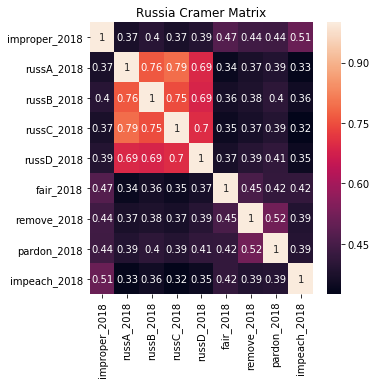

In [7]:
#A quick example with plotting
cramers_mat(slice_example,plot=True,title="Russia Cramer Matrix")

#### Observations from Example

From the heatmap above, we can observe the high values among the correlations of russA_2018, russB_2018, russC_2018, and russD_2018, with lower values for the rest. This means that respondents have consistent views on the seriousness of the charges (russA-russD) brought forth in the Mueller investigation, but less consistent views on what should be done about them. 

### 3.2 Questions with the Largest Correlations

Now that we have established the concept of correlations between categorical variables and have useful tools to observe them, we can go a step deeper. Are there questions that are correlated with lots of other questions? Which ones? And to what degree? To answer these we first need to create a Cramer matrix for the entire dataset.

#### Creating the all_Cramer matrix

Since the runtime for calculating a Cramer matrix with hundreds of rows and columns was quite extensive (it took around 4 hours), I decided to save the output as a .csv file so it could easily be imported after its initial creation. 

In [8]:
#to_Cramer = data.drop(["Weight","ID"], axis=1, level=3)
#to_Cramer.to_csv("AllCramerMat.csv)

In [9]:
all_Cramer = pd.read_csv("AllCramerMat.csv", index_col=0)
all_Cramer.head()

,vote18_2018,trumpapp_2018,trumpfeel_2018,fav_trump_2018,fav_ryan_2018,fav_obama_2018,fav_hrc_2018,fav_sanders_2018,fav_putin_2018,fav_schumer_2018,...,occupationcat_baseline,faminc_baseline,prim12_baseline,post_turnout12_2012,post_turnout_method12_2012,post_presvote12_2012,post_pid7_2012,post_pid3_2012,post_ideo5_2012,post_newsint_2012
Col_name,,,,,,,,,,,,,,,,,,,,,
vote18_2018,1.000000,0.450281,0.400818,0.439771,0.320680,0.450419,0.420229,0.371392,0.171075,0.381870,...,0.057771,0.050635,0.430932,0.126564,0.118679,0.394277,0.397662,0.388829,0.323206,0.151968
trumpapp_2018,0.450281,1.000000,0.557278,0.660950,0.330210,0.455726,0.405712,0.359251,0.204494,0.379573,...,0.064944,0.055118,0.360585,0.064286,0.063665,0.390255,0.370716,0.308988,0.341648,0.123755
trumpfeel_2018,0.400818,0.557278,1.000000,0.574585,0.317796,0.451211,0.413587,0.368548,0.209205,0.372747,...,0.066037,0.042214,0.367709,0.062012,0.061023,0.356406,0.337124,0.317321,0.308224,0.097888
fav_trump_2018,0.439771,0.660950,0.574585,1.000000,0.346030,0.502099,0.443832,0.379917,0.236107,0.374644,...,0.068254,0.055901,0.354612,0.055030,0.056912,0.385700,0.365044,0.302293,0.334433,0.099112
fav_ryan_2018,0.320680,0.330210,0.317796,0.346030,1.000000,0.315896,0.282111,0.310819,0.250352,0.330180,...,0.070739,0.078490,0.264401,0.089415,0.092527,0.296294,0.281993,0.238577,0.266135,0.182609


Now we have a Cramer matrix for the whole dataset!

####  'Trump Favorability' Example

Lets look at the variables that have the highest correlation to the survey question 'fav_trump_2018', which asks the following question with possible responses:<br><br>
**"Do you have a favorable or unfavorable opinion of Donald Trump?"**<br><br>
-1. Very favorable<br>
-2. Somewhat favorable<br>
-3. Somewhat unfavorable<br>
-4. Very unfavorable<br>
-8. Don't know

In [10]:
data['fav_trump_2018'].head()

Year,2018
Type,Cat_O_DN
Section,Pol_Approval
0,4.0
1,1.0
2,4.0
3,2.0
4,4.0


With the all_Cramer matrix, lets see which 10 questions have the greatest correlation to Trump favorability in 2018

In [11]:
all_Cramer.drop('fav_trump_2018')['fav_trump_2018'].sort_values(ascending=False).head(10)

Col_name
trumpapp_2018                0.660950
fav_trump_2017               0.610237
trumpapp_2017                0.580117
trumpfeel_2018               0.574585
selfdescr_ccap_7_baseline    0.556638
fav_trump_2016               0.533658
redovote2016_2017            0.531434
dailytalkshow_1_baseline     0.509666
Sanders_Trump_2016           0.506256
fav_obama_2018               0.502099
Name: fav_trump_2018, dtype: float64

Many of the top 10 are very similar questions (trumpfeel_2018), or are the same question from previous years (fav_trump_2017), but there are some interesting obervations. The question 'selfdescr_ccap_7_baseline' asks the respondent if they identify as being a conservative, and 'dailytalkshow_1_baseline' refers to watching the O'Reilly Factor on Fox News on a regular basis.

#### Highly Correlated Questions

Now that we see which questions are closely tied to Trump favorability, which questions are tied to most other questions? In other words, are there certain questions that show up in the top 10 correlations list of many other survey questions? We'll call these types of questions 'Highly Correlated Questions', or HCQs.

First we generate a matrix with the top 10 HCQs for each question in the survey.

In [12]:
#Drop the first col since it is always perfectly correlated to itself as 1
top10Cramer = all_Cramer.apply(lambda q: q.nlargest(11).index[1:], axis=1, result_type='expand')
top10Cramer.head()

,0,1,2,3,4,5,6,7,8,9
Col_name,,,,,,,,,,
vote18_2018,selfdescr_ccap_7_baseline,vote2018_2017,redovote2016_2017,Clinton_Cruz_2016,Clinton_Rubio_2016,Sanders_Trump_2016,dailytalkshow_1_baseline,healthreformbill_2017,Sanders_Rubio_2016,selfdescr_ccap_5_baseline
trumpapp_2018,fav_trump_2018,trumpapp_2017,fav_trump_2017,selfdescr_ccap_7_baseline,trumpfeel_2018,redovote2016_2017,dailytalkshow_1_baseline,fav_trump_2016,Sanders_Trump_2016,improper_2018
trumpfeel_2018,selfdescr_ccap_7_baseline,fav_trump_2018,trumpapp_2018,fav_trump_2017,trumpapp_2017,redovote2016_2017,dailytalkshow_1_baseline,Sanders_Trump_2016,fav_trump_2016,Clinton_Cruz_2016
fav_trump_2018,trumpapp_2018,fav_trump_2017,trumpapp_2017,trumpfeel_2018,selfdescr_ccap_7_baseline,fav_trump_2016,redovote2016_2017,dailytalkshow_1_baseline,Sanders_Trump_2016,fav_obama_2018
fav_ryan_2018,fav_ryan_2017,fav_mcconnell_2018,fav_ryan_2016,selfdescr_ccap_7_baseline,fav_rubio_2016,selfdescr_ccap_5_baseline,fav_cruz_2016,tax_2018,selfdescr_ccap_9_baseline,fav_pelosi_2018


Now we can generate a frequency matrix to count how many times each question appears in a top 10 list. Here is what that looks like.

In [13]:
top10Cramer_Freq =\
    top10Cramer.apply(lambda x: pd.Series.value_counts(x), axis=0).fillna(0).sort_values(by=[*range(10)],ascending=False)
top10Cramer_Freq.head(10)

,0,1,2,3,4,5,6,7,8,9
selfdescr_ccap_7_baseline,102.0,48.0,47.0,32.0,31.0,31.0,21.0,12.0,6.0,4.0
volunteer_baseline,12.0,1.0,1.0,1.0,2.0,0.0,2.0,0.0,0.0,1.0
selfdescr_ccap_9_baseline,9.0,15.0,29.0,33.0,23.0,17.0,28.0,31.0,20.0,9.0
dailytalkshow_1_baseline,7.0,29.0,29.0,24.0,19.0,26.0,22.0,10.0,26.0,10.0
selfdescr_ccap_11_baseline,7.0,4.0,4.0,4.0,13.0,4.0,0.0,1.0,0.0,1.0
immigration_help_2017,7.0,0.0,0.0,2.0,0.0,1.0,3.0,2.0,7.0,2.0
enews_show_4_baseline,5.0,5.0,17.0,12.0,21.0,19.0,24.0,16.0,13.0,13.0
ideo5_baseline,4.0,3.0,1.0,1.0,1.0,5.0,0.0,0.0,0.0,1.0
PARTY_AGENDAS_D1_2016,4.0,2.0,0.0,0.0,2.0,0.0,1.0,1.0,1.0,0.0
org_membership_21_baseline,4.0,1.0,3.0,3.0,1.0,3.0,3.0,2.0,1.0,1.0


Finally, we can add up the frequencies of each question appearing in a list and look at the results.

In [14]:
top10Cramer_Freq.sum(axis=1).sort_values(ascending=False).head(10)

selfdescr_ccap_7_baseline    334.0
selfdescr_ccap_9_baseline    214.0
dailytalkshow_1_baseline     202.0
selfdescr_ccap_5_baseline    198.0
enews_show_4_baseline        145.0
healthreformbill_2017         85.0
dailytalkshow_2_baseline      78.0
redovote2016_2017             71.0
Clinton_Cruz_2016             47.0
teapartsup_baseline           45.0
dtype: float64

In [15]:
all_Cramer.shape

(806, 806)

By far the most frequet HCQ is 'selfdescr_ccap_7_baseline', which shows up in 334/806 of the top 10 lists. Apparently, identifying as a conservative or not is a huge bottom line in how other questions are answered. The full interpretation of the questions in the above list of frequent HCQs are the following:

1. **selfdescr_ccap_7_baseline**: Self-identify (or not) as a Conservative
2. **selfdescr_ccap_9_baseline**: Self-identify (or not) as a Progressive
3. **dailytalkshow_1_baseline**: Watch the FOX O'Reiley Factor on a regular basis (or not)
4. **selfdescr_ccap_5_baseline**: Self-identify (or not) as a Liberal
5. **enews_show_4_baseline**: Watch FOX Special Report with Bret Baier on a regular basis (or not)
6. **healthreformbill_2017**: Do you think the health care reform bill that passed in 2010 should be expanded, kept the same, or repealed?
7. **dailytalkshow_2_baseline**: Watch FOX Hannity on a regular basis (or not)
8. **redovote2016_2017**: If you had the chance to do it again, how would you vote in 2016? (Choices Trump, Clinton, or someone else)
9. **Clinton_Cruz_2016**: If the 2016 election had been a race between Clinton and Cruz, who would you vote for?
10. **teapartsup_baseline**: Generally speaking, do you support or oppose the goals of the Tea Party movement?

It seems then that media consumption and political self-identification are huge factors that weave into other responses. This shouldn't come as much of a surprise in hindsight. I recognize that this is a bit of a rudementary approach to get correlations and HCQs, but it does give a rough idea of which questions are correlated to others in the survey.

## 4. Which political issues are priorities for the survey respondents?

There are a lot of large-scale issues that are tackled in the political sphere, ranging from health care to terrorism. Which of these issues are the highest priority to voters? Do these priorities shift from Trump to Clinton 2016 voters? And how much do they shift over time? We can get a view of this from the data.

#### 4.1 A bit more cleaning 

In order to observe these priorities graphically, we need to rename some of the columns to make the code easier to write and graphs easier to interpret. All of the named columns indicate an issue with a letter.

In [16]:
get_slice("IssueImportance",3).head()

Col_name,imiss_a_2017,imiss_b_2017,imiss_c_2017,imiss_d_2017,imiss_e_2017,imiss_f_2017,imiss_g_2017,imiss_h_2017,imiss_i_2017,imiss_j_2017,...,imiss_g_baseline,imiss_h_baseline,imiss_j_baseline,imiss_m_baseline,imiss_p_baseline,imiss_q_baseline,imiss_r_baseline,imiss_s_baseline,imiss_t_baseline,imissf_baseline
0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,8.0
1,1.0,1.0,2.0,3.0,1.0,1.0,4.0,3.0,3.0,1.0,...,2.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
2,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,...,4.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,4.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,...,3.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,4.0


The code below changes the column names to the issue to which they refer. 

In [17]:
issue_dict = {'a':"Crime", 'b':"The Economy", 'c':"Immigration", 'd':"The Enviroment", 'e':"Religious liberty",\
              'f':"Terrorism", 'g':"Gay Rights", 'h':"Education", 'i':"Family and Medical Leave", 'j':"Health Care",\
              'k':"Money in politics", 'l':"Climate Change", 'm':"Social Security", 'n':"Infrastructure Investment",\
              'o':"Jobs", 'p':"The Budget Deficit", 'q':"Poverty", 'r':"Taxes", 's':"Medicare", 't':"Abortion",\
              'u':"The Size of Government", 'x':"Racial Equality", 'y':"Gender Equality"}

def code_issues(name):
    if name[:6] != 'imiss_': return name
    issue, year = issue_dict[name[6]], name[7:]
    newname = issue+year
    
    #Only issue where letter differed from baseline to other years
    if issue == "Poverty" and year == "_baseline": newname = "War in Afganistan_baseline"

    return newname

In [18]:
data.rename(mapper=code_issues,axis=1,level=0,inplace=True)

In [19]:
get_slice("IssueImportance",3).head()

Col_name,Crime_2017,The Economy_2017,Immigration_2017,The Enviroment_2017,Religious liberty_2017,Terrorism_2017,Gay Rights_2017,Education_2017,Family and Medical Leave_2017,Health Care_2017,...,Gay Rights_baseline,Education_baseline,Health Care_baseline,Social Security_baseline,The Budget Deficit_baseline,War in Afganistan_baseline,Taxes_baseline,Medicare_baseline,Abortion_baseline,imissf_baseline
0,1.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,2.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0,8.0
1,1.0,1.0,2.0,3.0,1.0,1.0,4.0,3.0,3.0,1.0,...,2.0,3.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0
2,1.0,1.0,2.0,1.0,3.0,1.0,2.0,1.0,3.0,1.0,...,4.0,2.0,1.0,1.0,2.0,3.0,1.0,1.0,4.0,2.0
3,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,...,3.0,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0
4,2.0,2.0,2.0,1.0,4.0,2.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,3.0,1.0,2.0,1.0,1.0,4.0


These names are much more intuitive now.

#### 4.2 Slicing

We have data for this type of question from 2011, 2016, and 2017. Lets look at 2016-2017 since they have the same topics in question, while 2011 is lacking a few. 

In [20]:
s2017 = get_slice("IssueImportance",3).iloc[:,:23]
s2016 = get_slice("IssueImportance",3).iloc[:,23:46]

#Shaving off the decimal from the response, which was used to capture information in other questions.
#See the Cleaning notebook for details. 
s2017 = s2017.join(get_slice("presvote16post_2016",0).apply(np.round))
s2016 = s2016.join(get_slice("presvote16post_2016",0).apply(np.round))

#Grouping all non Clinton/Trump voters into 'Other'
s2017["presvote16post_2016"] = s2017["presvote16post_2016"].clip(upper=3)
s2016["presvote16post_2016"] = s2016["presvote16post_2016"].clip(upper=3)

#### 4.3 Plotting

The plots below show the counts of how important respondents rating each political issue, with 2016 responses on the left and 2017 responses on the right. The different colors correspond to who the respondent voted for in the 2016 general election. ('DK' means 'don't know')

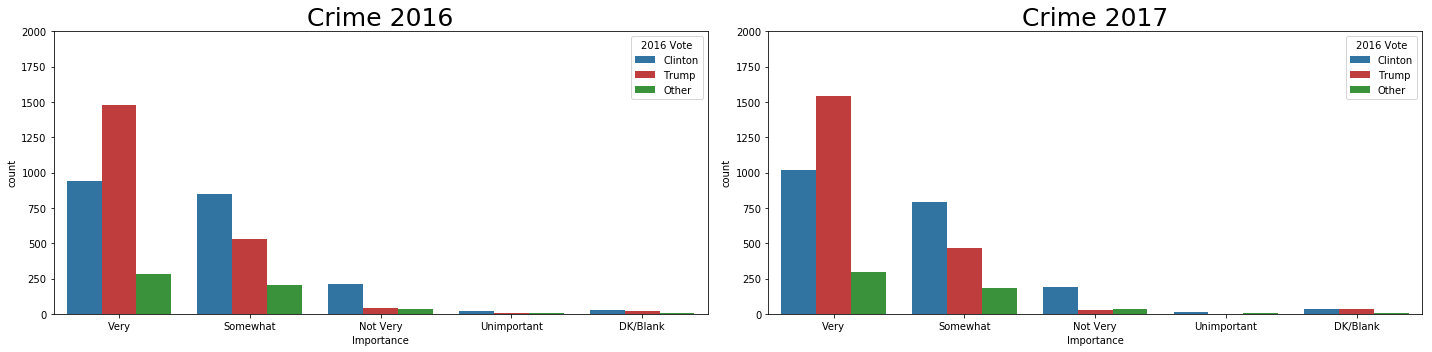

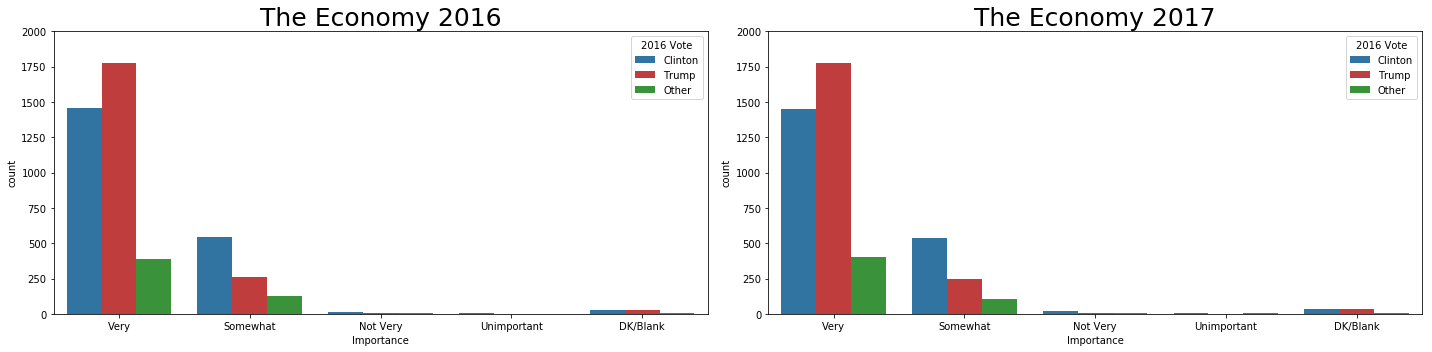

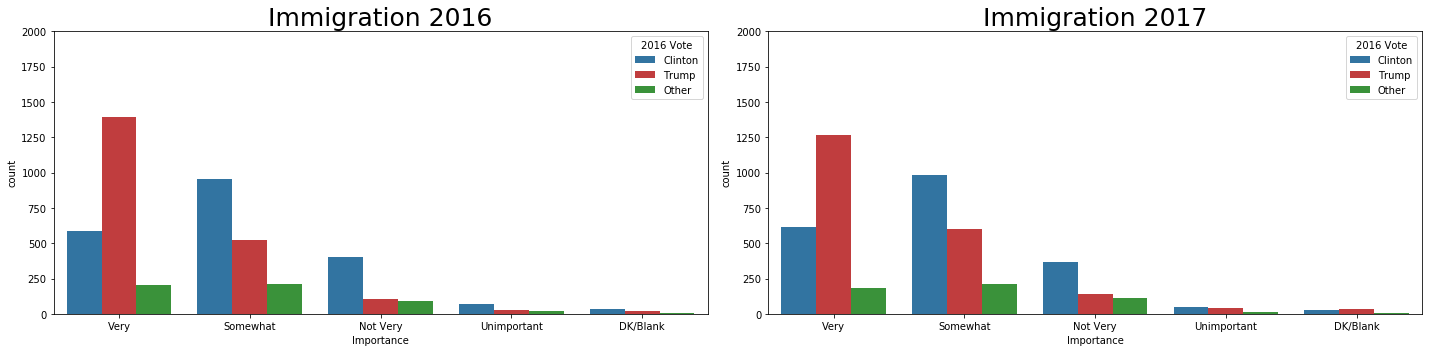

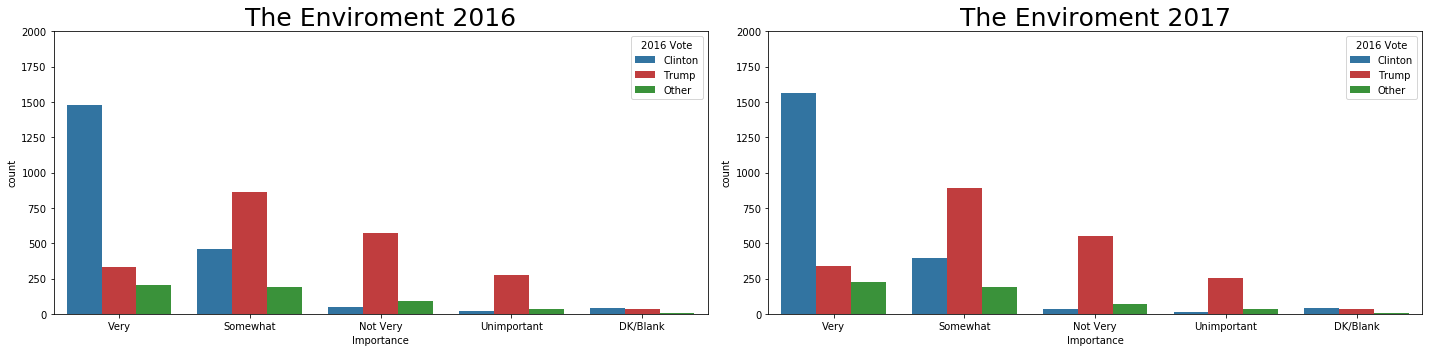

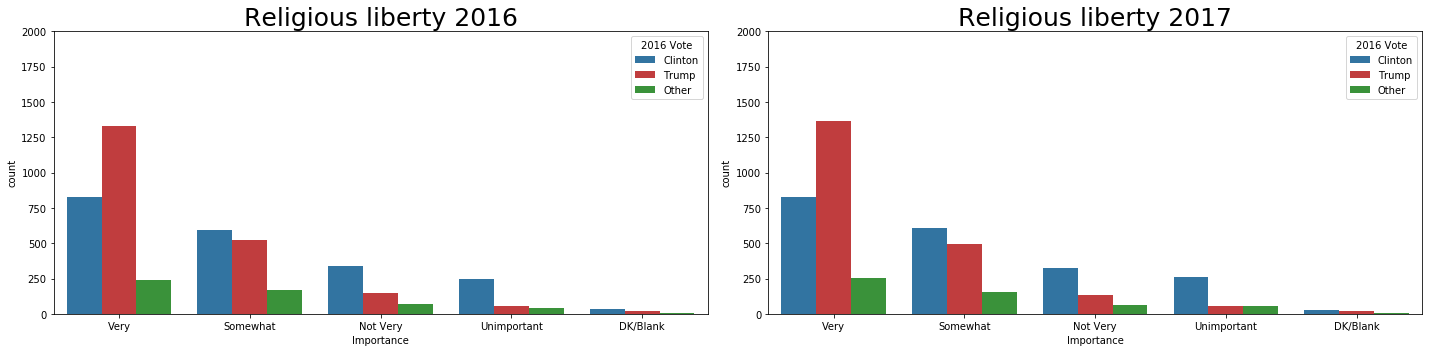

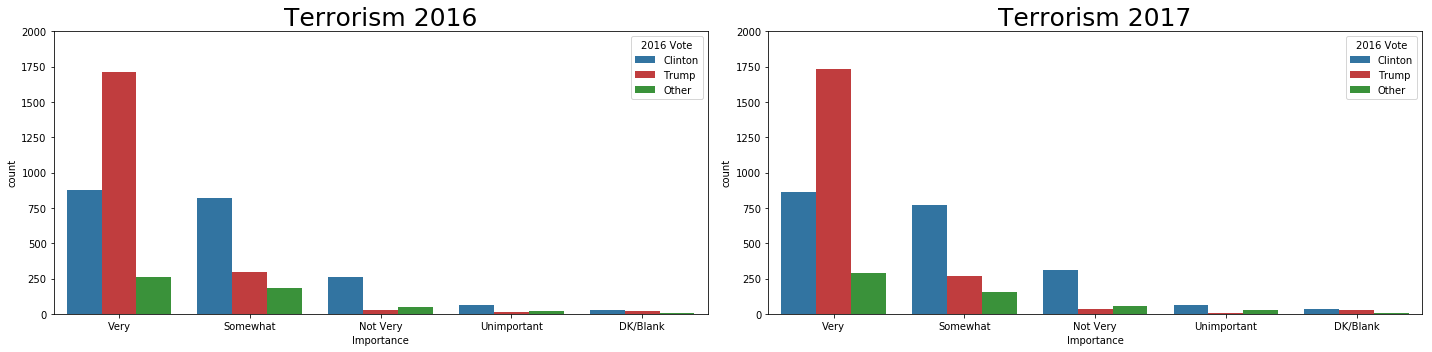

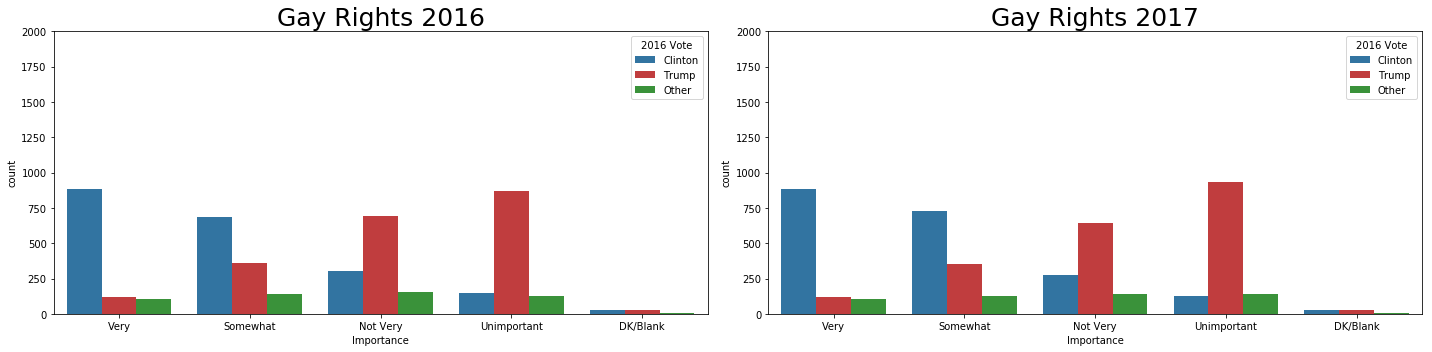

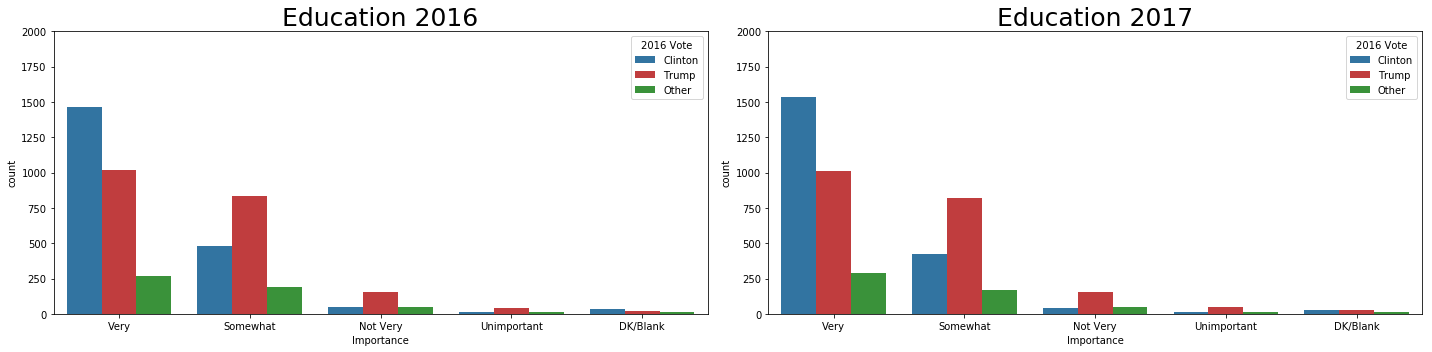

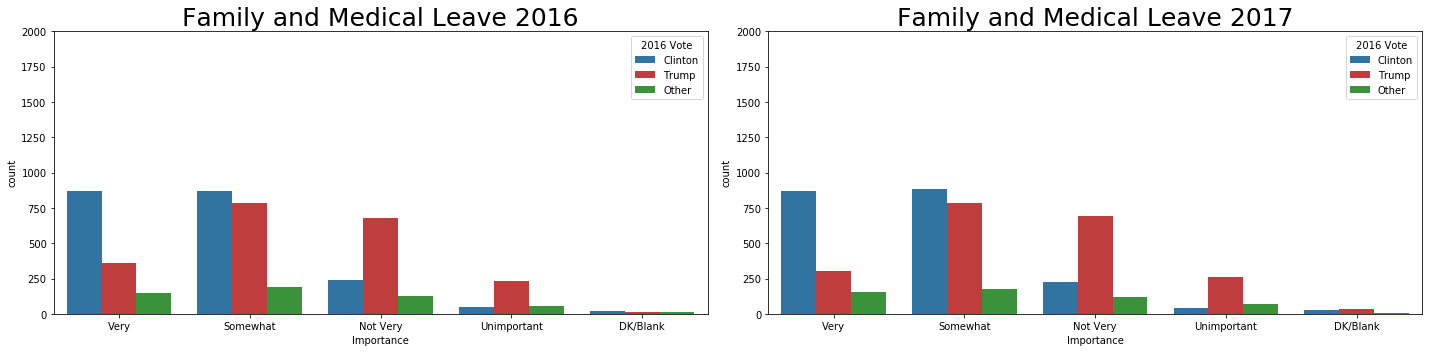

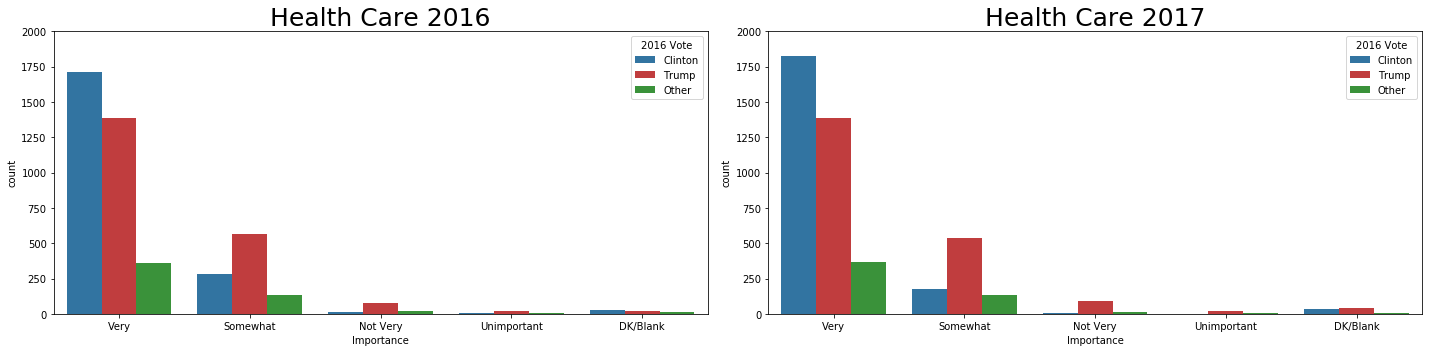

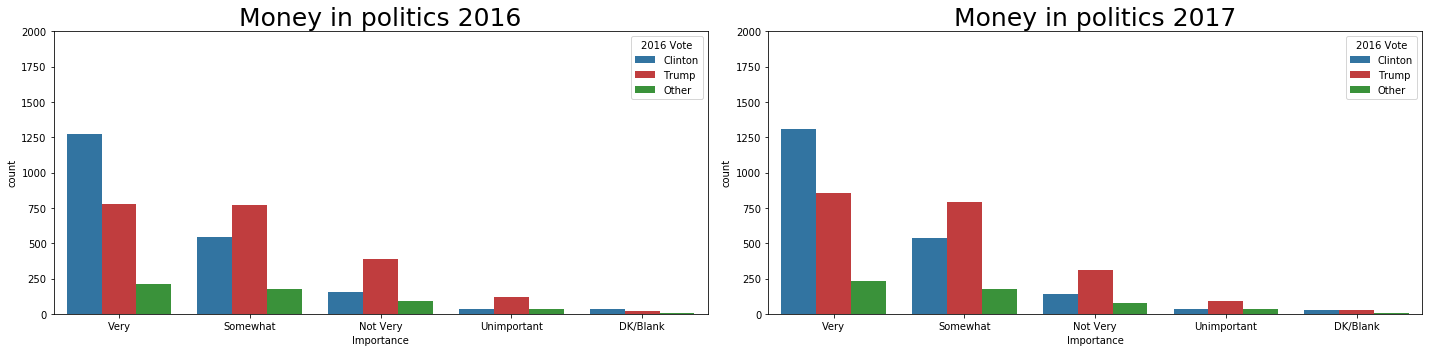

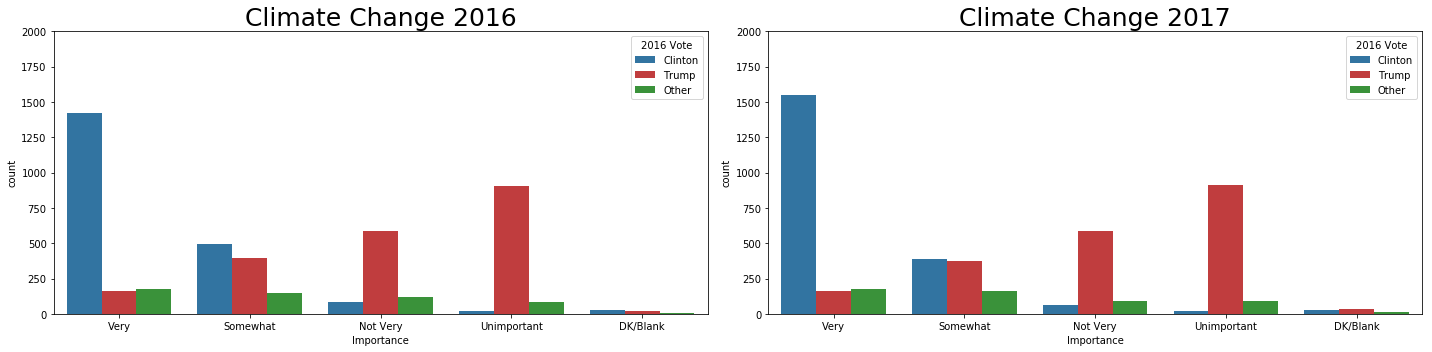

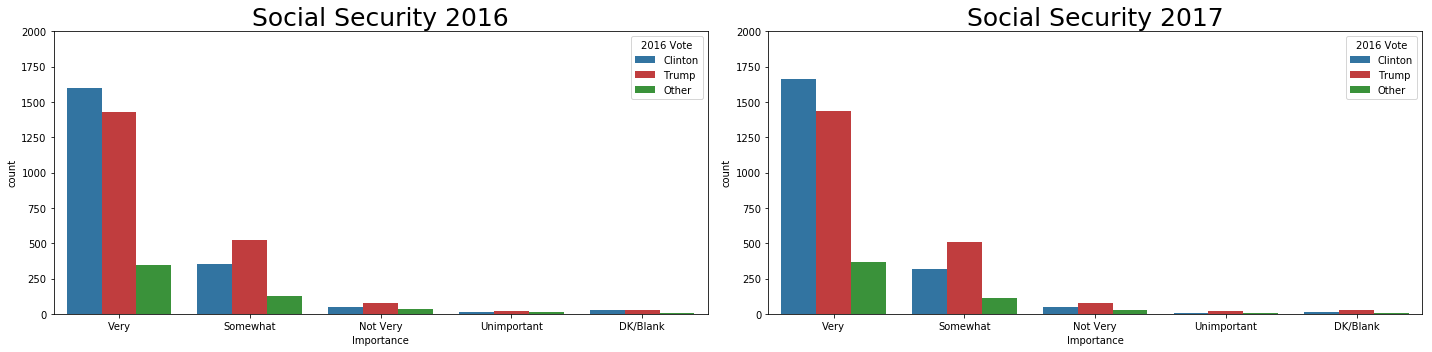

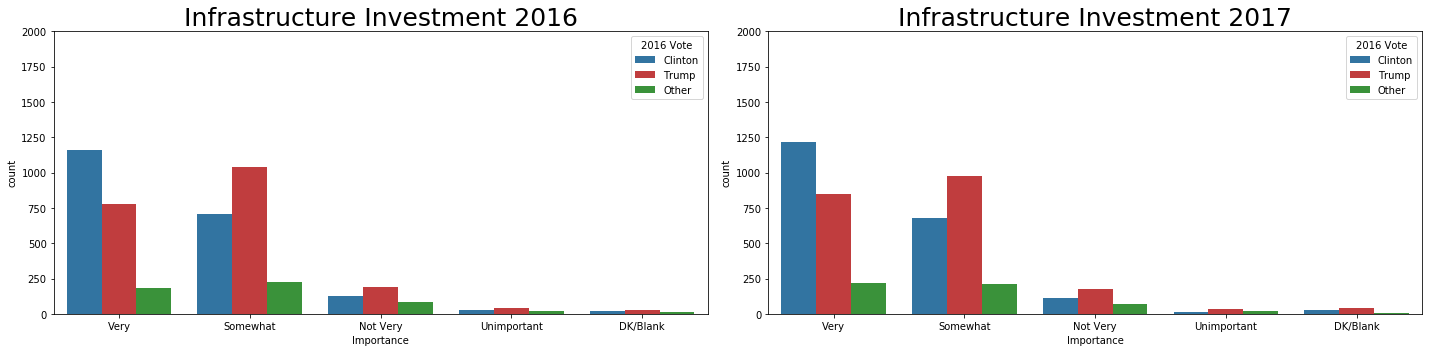

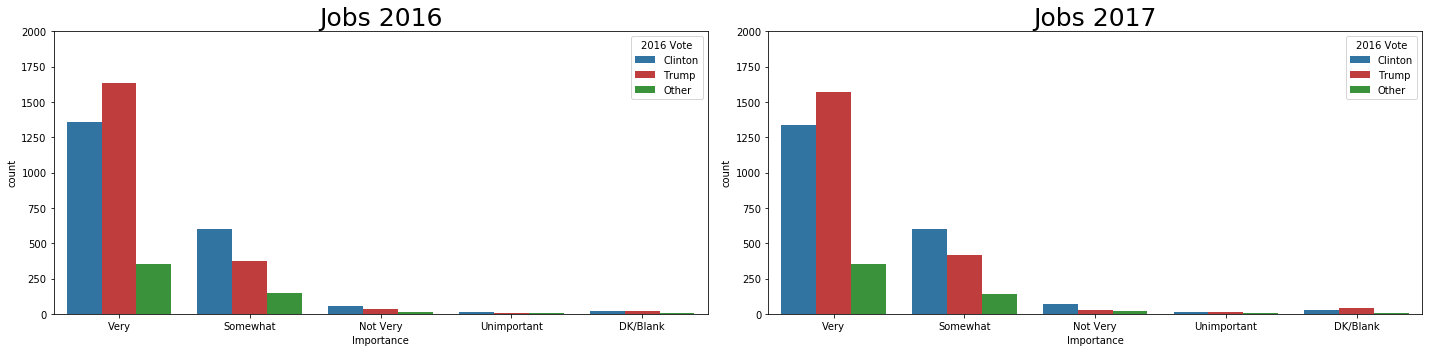

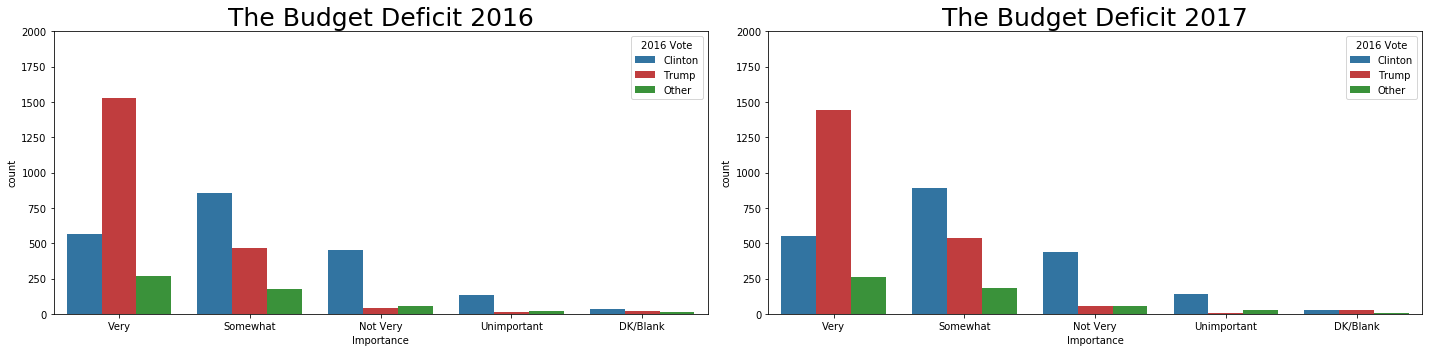

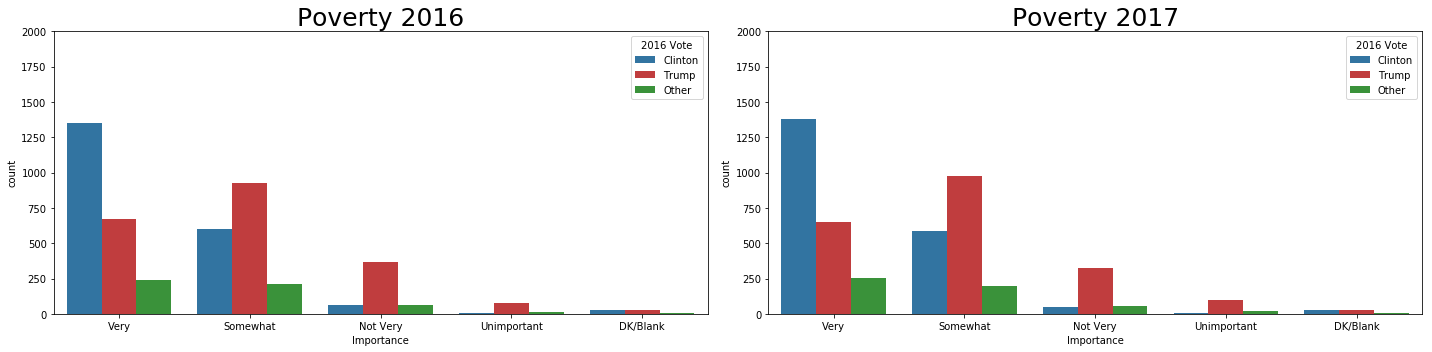

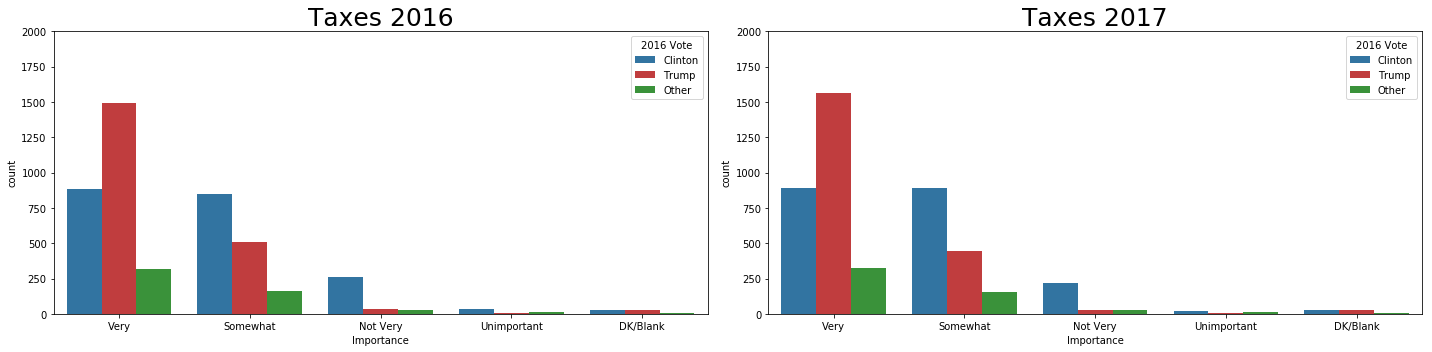

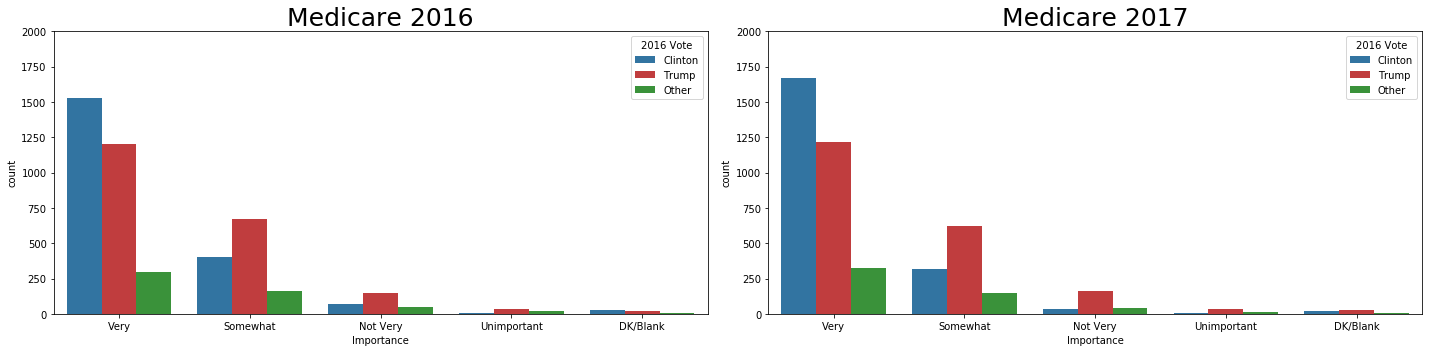

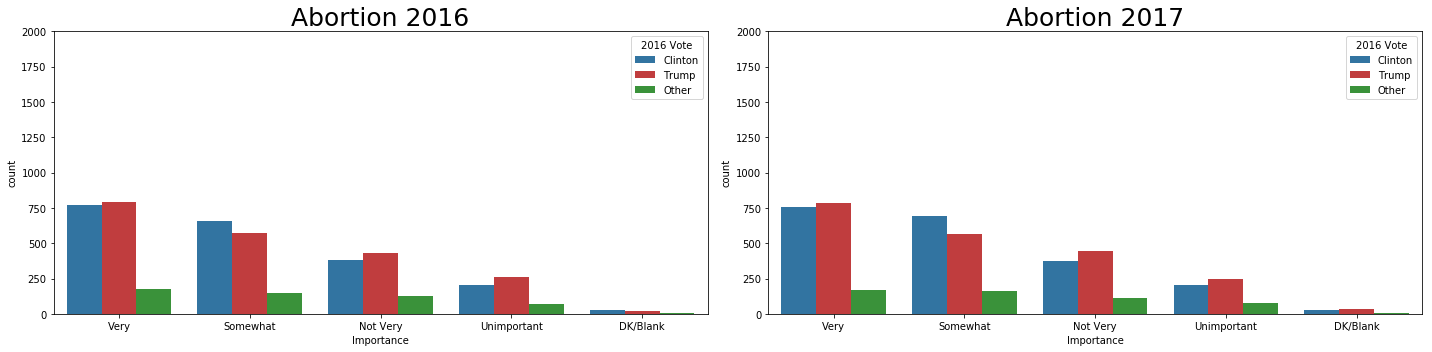

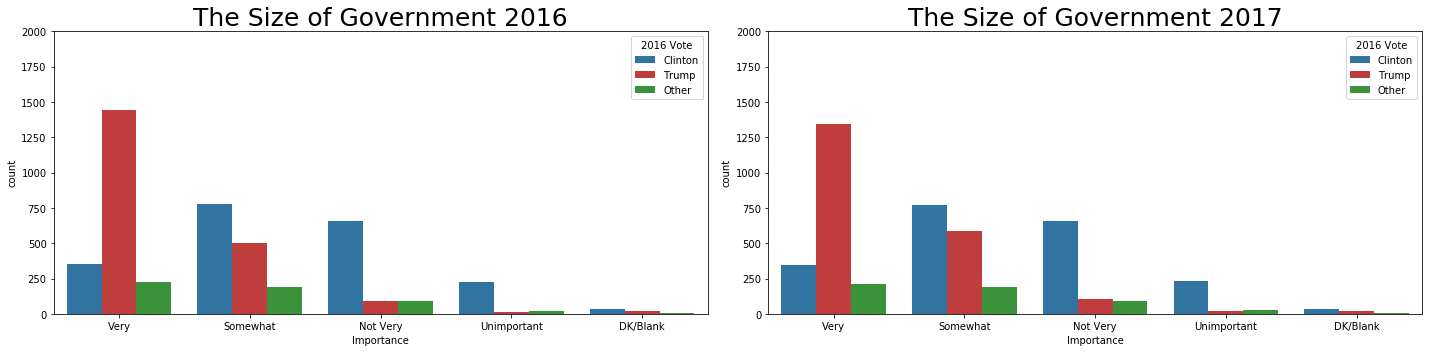

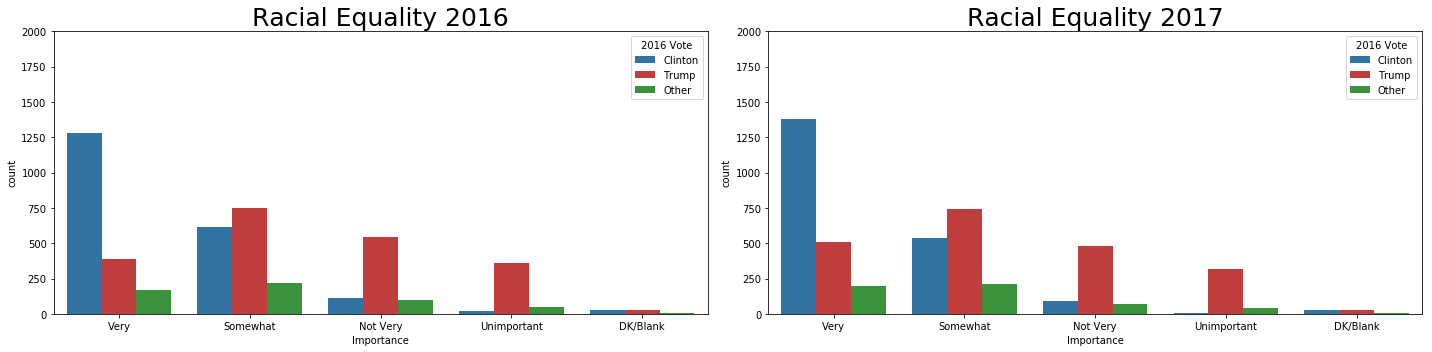

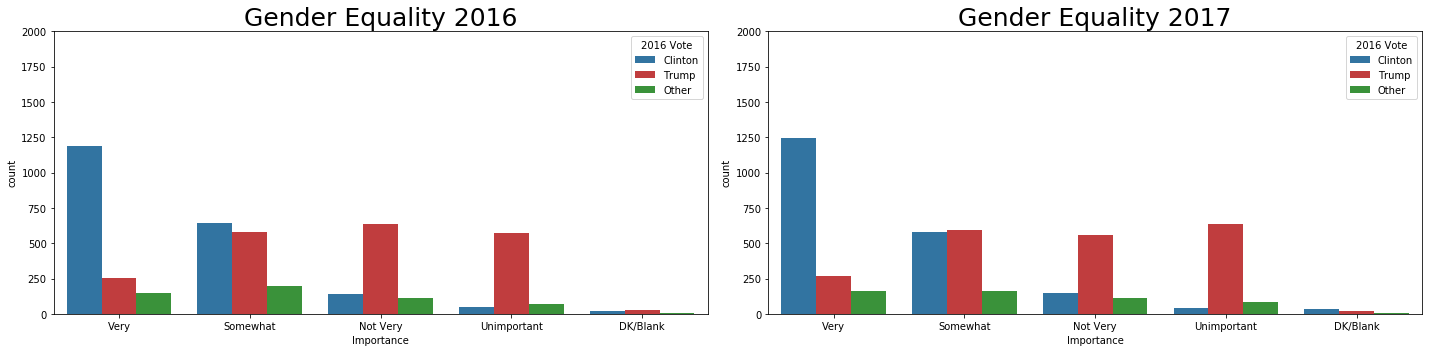

In [21]:
xlabels = ["Very", "Somewhat", "Not Very", "Unimportant", "DK/Blank"]

for i, iss in enumerate(issue_dict.values()):
    fig, ax = plt.subplots(1, 2, figsize=(20, 5))
    
    plt.subplot(1, 2, 1)
    ax = sns.countplot(x=s2016[iss+'_2016'],\
                       hue='presvote16post_2016',\
                       data=s2016,\
                       palette = ['tab:blue','tab:red','tab:green'])
    
    ax.set_title(iss+' 2016',size=25)
    ax.set_xticklabels(xlabels)
    ax.set(xlabel = "Importance", ylim=(0, 2000))
    plt.legend(title='2016 Vote', loc='upper right', labels=['Clinton', 'Trump', 'Other'])
    plt.tight_layout()
    
    plt.subplot(1, 2, 2)
    
    ax = sns.countplot(x=s2017[iss+'_2017'],\
                       hue='presvote16post_2016',\
                       data=s2017,\
                       palette = ['tab:blue','tab:red','tab:green'])
    
    ax.set_title(iss+' 2017',size=25)
    ax.set_xticklabels(xlabels)
    ax.set(xlabel = "Importance", ylim=(0, 2000))
    plt.legend(title='2016 Vote', loc='upper right', labels=['Clinton', 'Trump', 'Other'])
    plt.tight_layout()
    
    plt.show()

It appears that the 2 adjacent plots are nearly symmetrical, which indicates that people's priorities hardly changed from 2016 to 2017. Additionally, hot-button social/cultural issues (gay rights and abortion) such as aren't as prioritized as the economy and health care. Finally, there are clear partisan divides in most of the issues, with climate change in particular standing out.

#### 4.4 Comparing the Issues 

Here is are the counts for the 2016 priorities:

In [22]:
s2016.apply(pd.Series.value_counts)

Col_name,Crime_2016,The Economy_2016,Immigration_2016,The Enviroment_2016,Religious liberty_2016,Terrorism_2016,Gay Rights_2016,Education_2016,Family and Medical Leave_2016,Health Care_2016,...,Jobs_2016,The Budget Deficit_2016,Poverty_2016,Taxes_2016,Medicare_2016,Abortion_2016,The Size of Government_2016,Racial Equality_2016,Gender Equality_2016,presvote16post_2016
1.0,2703,3623,2183,2011,2400,2855,1110,2753,1377,3456,...,3345,2363,2258,2694,3028,1739,2019,1834,1588,2044.0
2.0,1580,931,1688,1516,1290,1298,1186,1501,1840,982,...,1123,1503,1737,1517,1236,1378,1471,1582,1420,2070.0
3.0,284,26,595,711,551,340,1143,251,1042,109,...,106,547,490,322,267,936,831,750,888,527.0
4.0,27,6,117,324,342,92,1139,71,334,34,...,25,161,97,51,59,537,263,422,688,NaN
997.0,47,55,58,79,58,56,63,65,48,60,...,42,67,59,57,51,51,57,53,57,NaN


#### Clinton Voter Priorities

Here are the counts of the issues rated 'Very Important' by Clinton voters:

In [23]:
dem = s2016[s2016['presvote16post_2016']==1].apply(pd.Series.value_counts).drop('presvote16post_2016',axis=1)
#Number of 'Very Important'
dem.sort_values(by=1,axis=1,ascending=False).iloc[0,:]

Col_name
Health Care_2016                  1714
Social Security_2016              1600
Medicare_2016                     1530
The Enviroment_2016               1476
Education_2016                    1466
The Economy_2016                  1461
Climate Change_2016               1421
Jobs_2016                         1358
Poverty_2016                      1350
Racial Equality_2016              1278
Money in politics_2016            1276
Gender Equality_2016              1189
Infrastructure Investment_2016    1161
Crime_2016                         943
Gay Rights_2016                    886
Taxes_2016                         882
Terrorism_2016                     876
Family and Medical Leave_2016      870
Religious liberty_2016             829
Abortion_2016                      772
Immigration_2016                   587
The Budget Deficit_2016            567
The Size of Government_2016        353
Name: 1.0, dtype: int64

#### Trump Voter Priorities

And for Trump Voters:

In [24]:
rep = s2016[s2016['presvote16post_2016']==2].apply(pd.Series.value_counts).drop('presvote16post_2016',axis=1)
#Number of 'Very Important'
rep.sort_values(by=1,axis=1,ascending=False).iloc[0,:]

Col_name
The Economy_2016                  1777
Terrorism_2016                    1716
Jobs_2016                         1634
The Budget Deficit_2016           1527
Taxes_2016                        1492
Crime_2016                        1480
The Size of Government_2016       1444
Social Security_2016              1426
Immigration_2016                  1393
Health Care_2016                  1385
Religious liberty_2016            1331
Medicare_2016                     1200
Education_2016                    1016
Abortion_2016                      792
Infrastructure Investment_2016     778
Money in politics_2016             776
Poverty_2016                       672
Racial Equality_2016               390
Family and Medical Leave_2016      357
The Enviroment_2016                330
Gender Equality_2016               254
Climate Change_2016                163
Gay Rights_2016                    118
Name: 1.0, dtype: int64

#### 'Other' Voter Priorities

And finally, priorities for people who didn't vote for either major canidate:

In [25]:
other = s2016[s2016['presvote16post_2016']==3].apply(pd.Series.value_counts).drop('presvote16post_2016',axis=1)
#Number of 'Very Important'
other.sort_values(by=1,axis=1,ascending=False).iloc[0,:]

Col_name
The Economy_2016                  385
Health Care_2016                  357
Jobs_2016                         353
Social Security_2016              347
Taxes_2016                        320
Medicare_2016                     298
Crime_2016                        280
Education_2016                    271
The Budget Deficit_2016           269
Terrorism_2016                    263
Religious liberty_2016            240
Poverty_2016                      236
The Size of Government_2016       222
Money in politics_2016            214
The Enviroment_2016               205
Immigration_2016                  203
Infrastructure Investment_2016    186
Abortion_2016                     175
Climate Change_2016               173
Racial Equality_2016              166
Family and Medical Leave_2016     150
Gender Equality_2016              145
Gay Rights_2016                   106
Name: 1.0, dtype: int64

It appears that Clinton voters generally prioritize health care-related issues, while Trump voters prioritize economic and safty-related issues more.

## 5. Where do the respondents stand on the major party platforms?

Lets take a look at questions relating to the major party agendas (Democratic and Republican). How do respondents feel about how each party is addressing major issues? And how does it differ between Trump and Clinton voters?

For these questions, we'll be looking at the PARTY_AGENDA questions from the survey. Respondents were asked 'Would you like to see the 'X' Party focus more, less, or about the same amount on the following priorities'. Party 'X' was randomly predetermined, so each respondent only answered these questions about a single party. This leads to half of these questions not being answered at all depending on which party the respondent was randomly assigned to assess.

#### 5.1 A bit more cleaning (again)

In order to get a good visualization, we have to do a bit of cleaning, renaming columns, and rotating things around.

In [26]:
#Clipping in this case means grouping all non Clinton/Trump voters into 'Other'
#Shaving off the decimal from the response, which was used to capture information in other questions.
#See the Cleaning notebook for details.
vote16 = get_slice("presvote16post_2016",0).clip(upper=3).apply(np.round)

agendas_slice = get_slice("PartyAgendaD",3).join(get_slice("PartyAgendaR",3).join(vote16))

#Droping those who answered blank to all agenda questions (only like 10)
agendas_slice = agendas_slice[(agendas_slice.iloc[:,:-1]!=997).any(axis=1)]
is_D = (agendas_slice.iloc[:,12:14]==997).all(axis=1)
agendas_slice['Dem_Agenda'] = is_D
agendas_slice.rename({'presvote16post_2016':'Vote_16'},axis=1,inplace=True)

#Replaces 997 with 0 for plotting histograms
agendas_slice = agendas_slice.replace(997, 0)

In [27]:
#The initial slice
agendas_slice.sample(5)

Col_name,PARTY_AGENDAS_D1_2016,PARTY_AGENDAS_D2_2016,PARTY_AGENDAS_D3_2016,PARTY_AGENDAS_D4_2016,PARTY_AGENDAS_D5_2016,PARTY_AGENDAS_D6_2016,PARTY_AGENDAS_D7_2016,PARTY_AGENDAS_D8_2016,PARTY_AGENDAS_D9_2016,PARTY_AGENDAS_D10_2016,...,PARTY_AGENDAS_R5_2016,PARTY_AGENDAS_R6_2016,PARTY_AGENDAS_R7_2016,PARTY_AGENDAS_R8_2016,PARTY_AGENDAS_R9_2016,PARTY_AGENDAS_R10_2016,PARTY_AGENDAS_R11_2016,PARTY_AGENDAS_R12_2016,Vote_16,Dem_Agenda
610,5.0,5.0,1.0,4.0,5.0,1.0,2.0,5.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,True
1809,4.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,5.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,True
1023,3.0,5.0,4.0,5.0,5.0,5.0,5.0,3.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,True
2228,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,3.0,2.0,3.0,4.0,1.0,5.0,3.0,2.0,False
2041,5.0,5.0,4.0,5.0,5.0,1.0,1.0,5.0,5.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,True


In [28]:
#Since half of the questions are blank for each respondent, we can eliminate the blank columns,
    #stack the nonblank ones on top of each other, and add a new column indicating which half 
    #was blank aka which party was assigned

#Rearranging so that the info on which party agenda is captured in the Dem_Agenda column
demcols = list(agendas_slice.columns[:12])+list(agendas_slice.columns[-2:])
repcols = list(agendas_slice.columns[12:24])+list(agendas_slice.columns[-2:])
D = np.array(agendas_slice[agendas_slice['Dem_Agenda']==True][demcols])
R = np.array(agendas_slice[agendas_slice['Dem_Agenda']==False][repcols])

#We rename the columns to which issue they represent
agendanames = ["Reducing the size of government","Creating jobs", "Renegotiating trade deals",\
               "Reforming the health care system", "Reducing how much Americans pay in taxes",\
               "Combating the effects of climate change", "Reducing poverty", "Restricting immigration",\
               "Reducing the national debt", "Increasing racial equality", "Combating terrorism",\
               "Standing up to political correctness"]

#Stacking the 2 nonblank parts 
agendas_combined = pd.DataFrame(np.vstack([D,R]), columns = agendanames + list(agendas_slice.columns[-2:]))

#Renaming some column entries and names to be more intuitive
agendas_combined['Vote_16'].replace(1, "Clinton", inplace=True)
agendas_combined['Vote_16'].replace(2, "Trump", inplace=True)
agendas_combined['Vote_16'].replace(3, "Other", inplace=True)
agendas_combined['Dem_Agenda'].replace(True, "D", inplace=True)
agendas_combined['Dem_Agenda'].replace(False, "R", inplace=True)

agendas_combined.rename({'Dem_Agenda':'Agenda'},axis=1,inplace=True)

#A look at the final slice after all the changes before plotting
agendas_combined.sample(5)

,Reducing the size of government,Creating jobs,Renegotiating trade deals,Reforming the health care system,Reducing how much Americans pay in taxes,Combating the effects of climate change,Reducing poverty,Restricting immigration,Reducing the national debt,Increasing racial equality,Combating terrorism,Standing up to political correctness,Vote_16,Agenda
3004,3,1,3,1,3,1,1,1,3,1,3,3,Other,R
1172,1,1,1,5,1,1,1,5,5,1,1,1,Trump,D
41,4,4,4,2,4,2,1,5,4,1,5,5,Trump,D
789,3,5,3,4,4,3,5,3,5,4,4,3,Clinton,D
4199,3,4,3,4,5,3,3,4,5,3,4,2,Other,R


#### 5.2 Plotting 

C:\Users\James\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


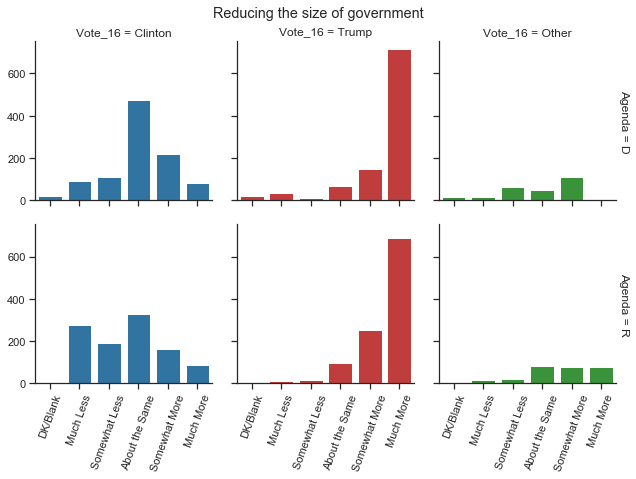

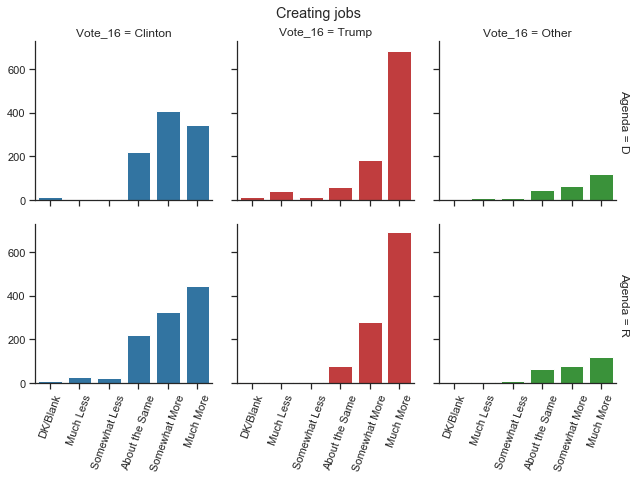

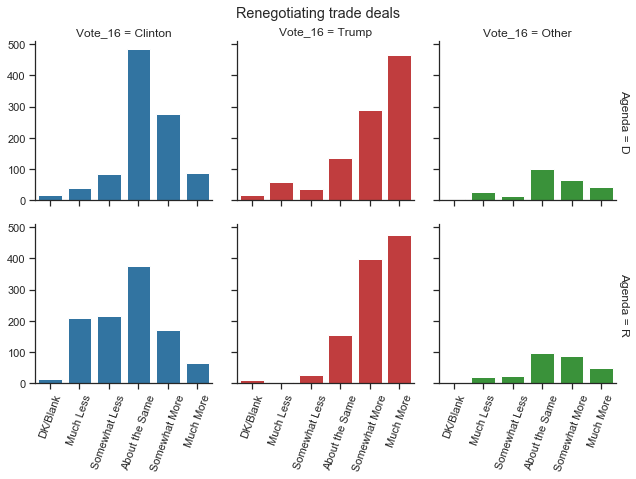

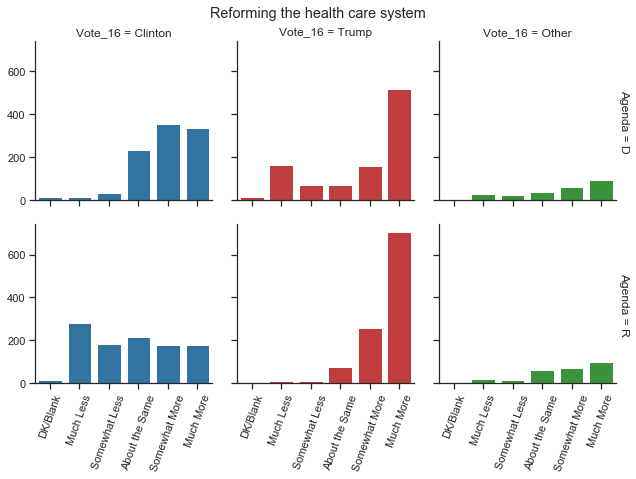

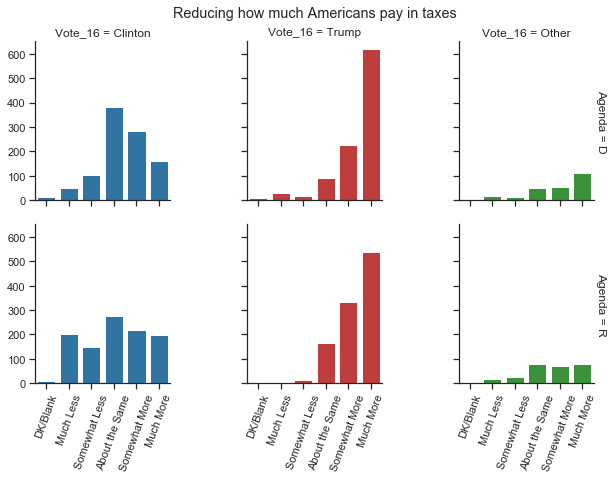

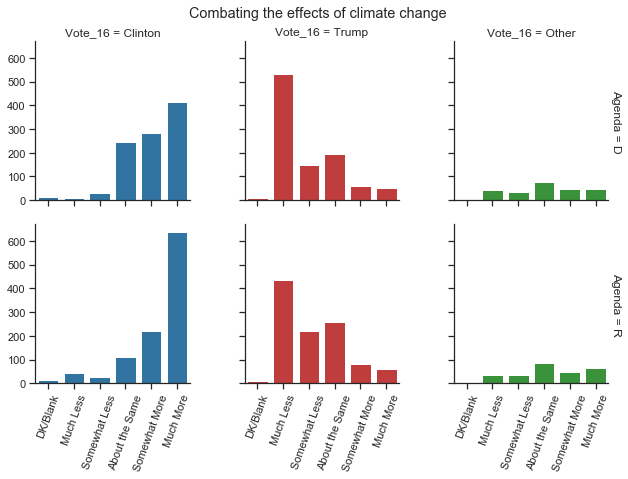

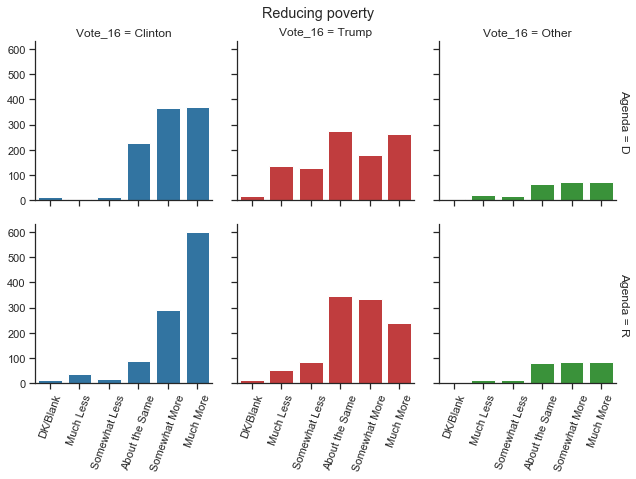

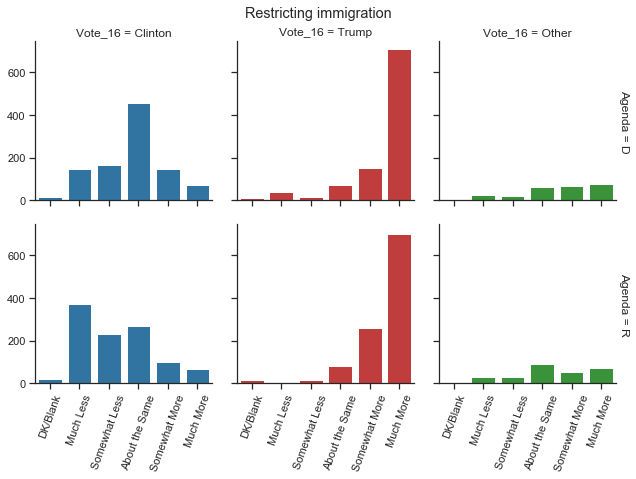

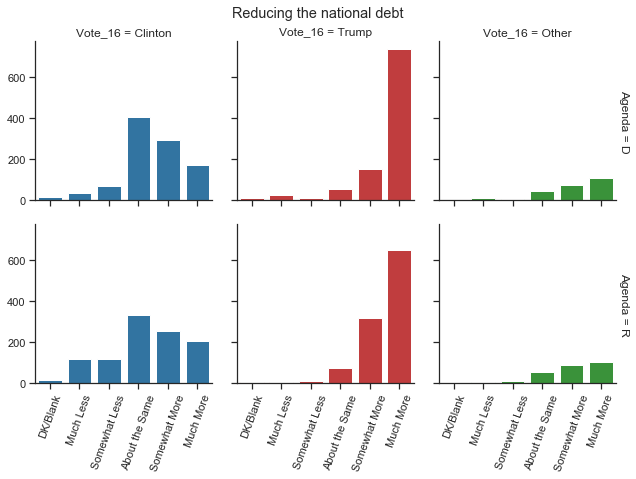

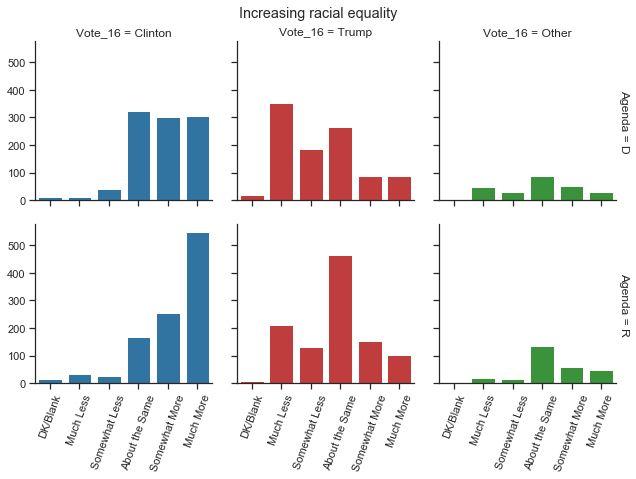

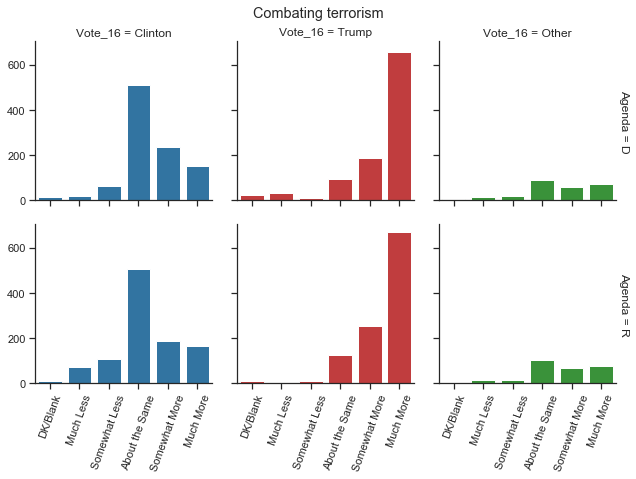

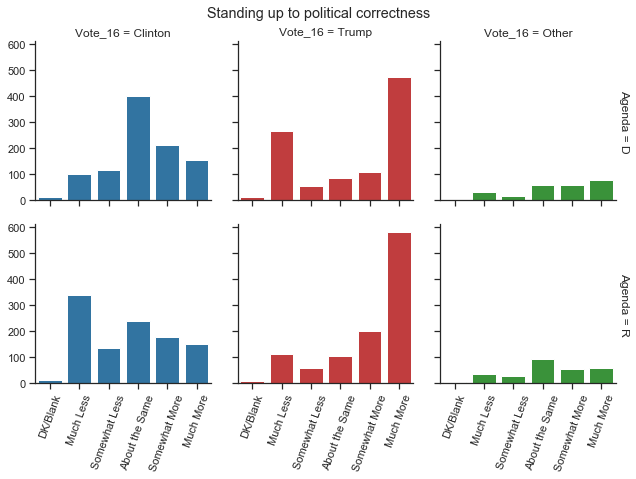

In [29]:
sns.set(style="ticks", color_codes=True)

for a in agendas_combined.columns[:-2]:
    g = sns.FacetGrid(agendas_combined,\
                      col="Vote_16", row="Agenda", hue="Vote_16",\
                      palette = ['tab:blue','tab:red','tab:green'],\
                     margin_titles=True)
    g = g.map(sns.countplot, a)
    plt.subplots_adjust(top=0.9)
    g.fig.suptitle(a)
    g.set(xlabel=None)
    g.set_xticklabels(["DK/Blank", "Much Less", "Somewhat Less", "About the Same", "Somewhat More", "Much More"], rotation=70)
    plt.show()

While there is a lot to unpack from these plots, some interesting observations I had:<br>
   1. Trump voters want the Republican party to prioritize issues they care about much more than Clinton voters do so for the Democratic party. In other words, Trump voters are much less satisfied with their party than Clinton voters. Restricting Immigration vs Increasing Racial Equality is a good example of this. <br><br>
   2. Clinton voters generally respond 'About the Same' at much higher rates, while Trump voters generally respond 'Much More'. This could be a factor of how the questions are worded, for example "Shifting the tax burden" might have different responses than "Reducing how much Americans pay in taxes."<br><br>
   3. The only significanly U-shaped subplot (*more responses in the "Much Less and "Much More" categories*) is the Democratic party 'Standing up to political correctness" for Trump voters. Either this means that their is a split among Trump voters on how the Democratic party is handling political correctness or (in my vew) some respondents interpreted the question as Standing up FOR political correctness. 